In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #.tree= modul Decision..=class impliments decision tree algorithm
from sklearn import tree
import joblib
import time
from sklearn.model_selection import train_test_split #train our module
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import datetime as dt

import plotly.graph_objects as go

pd.set_option('display.max_columns',None)

import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import torch
# Load the data
data_russia_losses_personnel = pd.read_csv("russia_losses_personnel2.csv")

In [130]:
#A new uppdated slimmed down version of my Russia losses 

In [131]:
print(data_russia_losses_personnel.columns)
print(data_russia_losses_personnel.head())
print(data_russia_losses_personnel.shape[0])

Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')
         date  day  personnel personnel*    POW
0  2022-02-25    2       2800      about    0.0
1  2022-02-26    3       4300      about    0.0
2  2022-02-27    4       4500      about    0.0
3  2022-02-28    5       5300      about    0.0
4  2022-03-01    6       5710      about  200.0
62


In [132]:
#Searching for categorial colums
categorical = [var for var in data_russia_losses_personnel.columns if data_russia_losses_personnel[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 ['date', 'personnel*']


In [133]:
#Changes non numeric to numerc personnel*
mapping = {'about': 1, 'more': 2 }
data_russia_losses_personnel= data_russia_losses_personnel.replace(mapping)

data_russia_losses_personnel.to_csv('Changed_russia_losses_personnel2.csv', index = False)
print(data_russia_losses_personnel.head())


         date  day  personnel  personnel*    POW
0  2022-02-25    2       2800           1    0.0
1  2022-02-26    3       4300           1    0.0
2  2022-02-27    4       4500           1    0.0
3  2022-02-28    5       5300           1    0.0
4  2022-03-01    6       5710           1  200.0


In [134]:
data_russia_losses_personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        62 non-null     object 
 1   day         62 non-null     int64  
 2   personnel   62 non-null     int64  
 3   personnel*  62 non-null     int64  
 4   POW         62 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.6+ KB


In [135]:
# read the CSV file into a pandas DataFrame
data_russia_losses_personnel = pd.read_csv("Changed_russia_losses_personnel2.csv")
data_russia_losses_personnel.date = pd.to_datetime(data_russia_losses_personnel.date)

# convert the "POW" column from float to integer
data_russia_losses_personnel["POW"] = data_russia_losses_personnel["POW"].astype(int)

# save the modified DataFrame back to the CSV file
data_russia_losses_personnel.to_csv("Changed_russia_losses_personnel3.csv", index=False)

In [136]:
data_russia_losses_personnel.info()
print(data_russia_losses_personnel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        62 non-null     datetime64[ns]
 1   day         62 non-null     int64         
 2   personnel   62 non-null     int64         
 3   personnel*  62 non-null     int64         
 4   POW         62 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(3)
memory usage: 2.3 KB
        date  day  personnel  personnel*  POW
0 2022-02-25    2       2800           1    0
1 2022-02-26    3       4300           1    0
2 2022-02-27    4       4500           1    0
3 2022-02-28    5       5300           1    0
4 2022-03-01    6       5710           1  200


In [137]:
#correlations tabell
#target and value; the best feature is when df and taget has a high value . 
corr_df=data_russia_losses_personnel.corr()
data_russia_losses_personnel.describe()

C:\Users\stahl\AppData\Local\Temp\ipykernel_23432\3198507616.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,day,personnel,personnel*,POW
count,62.000000,62.000000,62.000000,62.000000
mean,32.500000,15576.064516,1.096774,386.387097
std,18.041619,5043.175125,0.298064,131.440363
min,2.000000,2800.000000,1.000000,0.000000
25%,17.250000,12000.000000,1.000000,389.000000
50%,32.500000,16800.000000,1.000000,421.000000
75%,47.750000,19575.000000,1.000000,474.500000
max,63.000000,22400.000000,2.000000,496.000000


Text(0.5, 1.0, 'After Normalization')

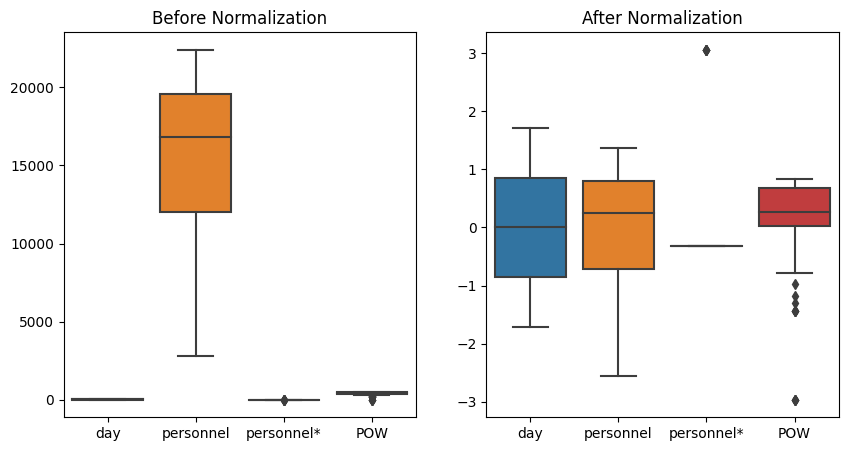

In [138]:
continuous_columns = [ "day", "personnel", "personnel*", "POW"]

continuous_df = data_russia_losses_personnel[continuous_columns]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(continuous_df)

normalized_df = pd.DataFrame(normalized_data, columns=continuous_columns)
 
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=continuous_df, ax=axes[0])
sns.boxplot(data=normalized_df, ax=axes[1])
axes[0].set_title("Before Normalization")
axes[1].set_title("After Normalization")

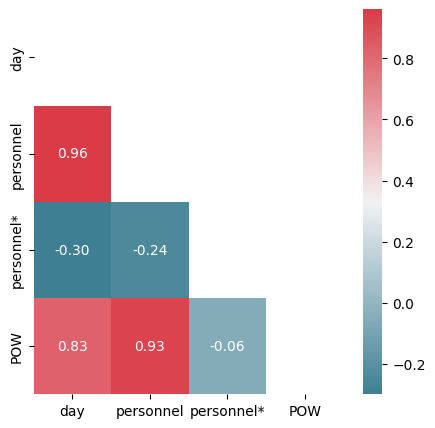

In [139]:
def print_corr_heatmap(corr_df):#correlation against POW. You can see, for example, that personnel (persons killed have a high correlation with POW)
    corr_list = corr_df.day.abs().sort_values(ascending=False).index[0:] #sorterar värden

    plt.figure(figsize=(5,5))
    drop_self = np.zeros_like(corr_df)
    drop_self[np.triu_indices_from(drop_self)] = True

    sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)
    
print_corr_heatmap(corr_df)

In [140]:
#scary figures show many more died in the war than tagists as POW
df_personnel = data_russia_losses_personnel[['personnel', 'POW']].max()
fig = px.pie(names = df_personnel.index,
             values =df_personnel.values,
             title = 'Person losses and POWs')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [141]:
data_russia_losses_personnel.shape

(62, 5)

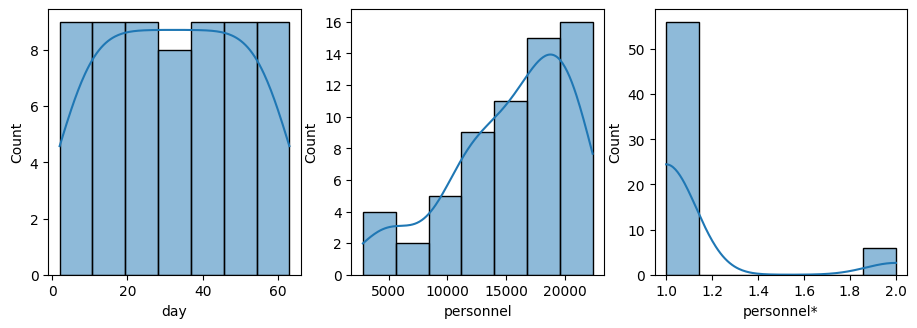

In [142]:
from scipy.stats import norm

plt.figure(figsize=(15, 20))

for i in range(1, len(data_russia_losses_personnel.columns) - 1):
    plt.subplot(5, 4, i)
    sns.histplot(data_russia_losses_personnel[data_russia_losses_personnel.columns[i]], kde=True)

In [143]:
X = data_russia_losses_personnel.drop(['POW', 'personnel*', 'date'], axis=1) 
y = data_russia_losses_personnel['POW']

In [144]:
#trains and tests the dataset. Splits in two. test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [145]:
model = DecisionTreeClassifier()# the instance that we will train
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
joblib.dump(model,'Changed_russia_losses_personnel3.joblib')

['Changed_russia_losses_personnel3.joblib']

In [147]:

#below we look at probabilities to get the accuracy score
predictions= model.predict(X_test)

#accuray score needs two arguments to get its value.
# y_test is the expected value. Predictions = current value
score = accuracy_score(y_test, predictions)
print("Score: ", score)

Score:  0.9230769230769231


In [148]:


rfc = RandomForestClassifier(n_estimators=500)
start_time = time.time()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)



end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time, " sek")

score = accuracy_score(y_test, y_pred)
print("Score: ", score)


Time:  0.417982816696167  sek
Score:  0.8461538461538461
